# **Statistics Basics in Python**

In [1]:
# imports
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools
from datetime import date
from scipy.stats import norm, anderson, t
from scipy.stats import gaussian_kde

## **Discrete Random Variables**

Chapter content:

*   Discrete random variables
  *   Probability Mass Function (PMF)
*   Uniform Distribution


**Random variable:** An event/variable that has outcomes which take specific probabilities

examples of random variables include coin flips.
event ($X$) = coin flip, set of outcomes and
probabilities $p(x) = P(X=x) = \{H=0.5, T=0.5\}$

this would usually be displayed using a discrete probability distribution 

**Discrete Random Variable:** An even with a finite number of outcomes. 

**Probability Mass Function (PMF):** 

$p(x) = P(X=x): x \rightarrow [0,1]$, were $\sum_{x \in X} (p(x)) = 1$, the probability mass function tells us the likelihood / probability that a discrete random variable takes a specific value. For example the likelihood of a discrete uniformly distributed random variabe is decribed by a PMF. 

**Uniform Distribution:**

A distribution were each outcome has equal probability. Rolling a die of any amount of sides (not rigged) is uniformly distributed.

The Uniform distribution is often denoted as $X \sim U(a, b)$, which is read as "*The random variable $X$ is uniformly distributed over the range $[a, b]$*."


Die min value: 1
Die max value: 6


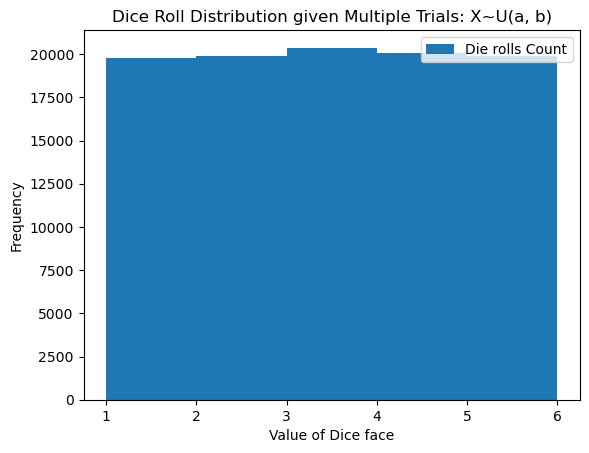

In [4]:
# for repeatability
np.random.seed(123)

# construct a class that stores methods and attributes for simulating a discrete probability distribution
class DiscreteRandomVariable:
  def __init__(self, a=0, b=1):
    # these are our default instance attributes (these are variables associated with a class or instance)
    # these attributes will change in each instance of the class (varying over object creation)
    self.variableType = "Uniform"
    self.low = a
    self.high = b
    return
  
  def draw(self, numberOfSamples):
    # the function that gets the random variable
    samples = np.random.randint(self.low, self.high, numberOfSamples) # function takes lowvalue, highestvalue, numberofsamples and returns a list
    return samples

# instantiate an object (an instance of a class) were we define attributes a and b
DieRolls = DiscreteRandomVariable(1, 6)
# print the class attributes
print("Die min value:", DieRolls.low)
print("Die max value:", DieRolls.high)
# simulate Die roll
simulations = 100000 # due to the law of large numbers (LLM) as we increase this value the uniform distribution will be better approximated
plt.hist(DieRolls.draw(simulations), bins = [1, 2, 3, 4, 5, 6], align = "mid", label = "Die rolls Count")
plt.title("Dice Roll Distribution given Multiple Trials: X~U(a, b)")
plt.xlabel("Value of Dice face")
plt.ylabel("Frequency")
plt.legend();

## **Binomial Distribution**

Chapter content:
*   Binomial event
   *    Binomial Formula
*   Binomial distribution

**Bernoulli Trials:**

A Bernoulli trial is a random experiment with exactly two possible outcomes: "success" and "failure."

**Bernoulli random variable:**

Bernoulli random variable is a variable that represents the outcome of a single Bernoulli trial. This is a way to numericaly represnet the outcome of the experiminet, e.g. "success" is represnsted by 1 and "failure" is represented by 0.

**Binomial Distribution:**

 This is a type of discrete probability distribution that describes the number of successes in a sequence of independent bernoulli trails.

Key charachteristics:

1.   Binomial / Bernoulli, events (binray trials) only have two possible outcomes
2.   Independant trials (Outcomes have no affect on the probabilities of other outcomes)
3.   Fixed probability of success
4.   Finite Trials (the number of trails is not infinite)

**Combination:**

This is the process of selecting items from a sample were order does not matter. (i.e. we only care about the group, 123 is the same as 321 or 132, this is one combination)

Combination $= nCr = \frac{n!}{r! (n-r)!}$

where...
*   $n$ = number of trials
*   $r$ = number of success's
*   $!$ = factorial operator, where $n! = (n)(n-1)...(1)$

Examples of combinations:
*    Selecting a committee of 3 people from the same group of 5 (we dont care about order, same group is the same committe)

**Permutation:**

This is the process of selecting items from a sample were order does matter, meaning different lists sorted differently will be counted as permutations. (i.e. 123, 321 and 132 are all counted permutations)

Permutation $= nPr = \frac{n!}{(n-r)!}$

Examples of permutations...
*   Choosing the president, vice president, and secretary from a group of 5 people (we care about order, same names in different
    roles means different roles to same people. We care abot how many differetn ways we can assign these roles to a group of 3 
    out of 5 people.)

**Binomial Distribution Notation:**

$X \sim B(n, p)$, this is read as "*The Random variable $X$ is Binomialy distributed with parameters $n$ and $p$"

**PMF for Binomial Distribution:** 

$$
p(x) = P(X = x) = \begin{pmatrix} n \\ x \end{pmatrix} \cdot p^x \cdot (1 - p)^{n - x} = \frac{n !}{(n - x)! x!} \cdot p^x (1 - p)^{n - x}
$$

The Distribution Type: Binomial
The Number of Trials: 10
The Probability of Success: 0.5
The fraction of trials with 5 up days: 0.24%


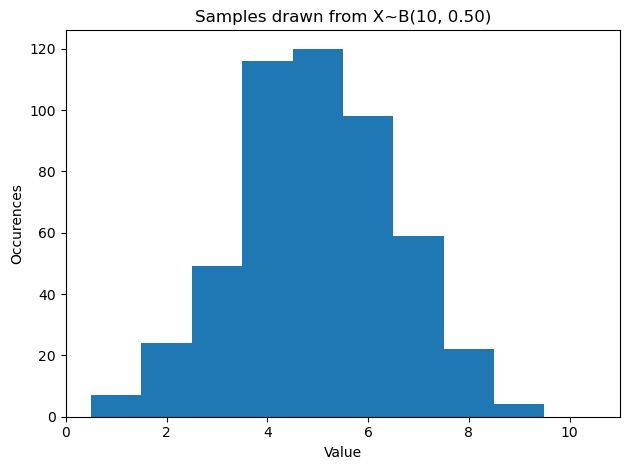

In [6]:
# for repeatability
np.random.seed(123)

# Let's Create a class that takes X a discrete random variable which has a binomial with n trials and p probability of success
# The class will have a method that calculates the probability given n and p
class BinomialRandomVariable():
  # n = finite trials, p = probability of success (can have up from 0 to n success's)
  def __init__(self, n, p):
    self.variableType = "Binomial"
    self.NumberOfTrials = n
    self.ProbabilityOfSuccess = p
    return
  def draw(self, x):
    # numpy binomial function takes n = trails, p = distributions probability of success,
    # samples will return a list
    samples = np.random.binomial(self.NumberOfTrials, self.ProbabilityOfSuccess, x)
    return samples

# instantiate an object (an instance of a class) were we define attributes n and p
# out of 10 trading days, the probability of an up day is 0.5
# the success in this case is an up day
n, p = 10, 0.5
BiasStockUp = BinomialRandomVariable(n, p)
print("The Distribution Type:", BiasStockUp.variableType)
print("The Number of Trials:", BiasStockUp.NumberOfTrials)
print("The Probability of Success:", BiasStockUp.ProbabilityOfSuccess)
# Simulate X, Binomial Distributed Random Variable with B(n, p)
# We simulate n = 10 trading days (X) with a probability of an up day (p) equal to 50% and count how many are up days
# We repeat this trial 500 times
# we then plot a histogram that shows the probability of obtaining k up days out of n = 10 trials across the 500 trials
simulations = 500
BinomialSimulations = BiasStockUp.draw(simulations)
plt.hist(BinomialSimulations, bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.title("Samples drawn from X~B(10, 0.50)")
plt.tight_layout()

# given 500 simulations / trials lets count the number of up days equal to 5 (k = 5)
# notice how It's unlikely to observe k > 8, given p = 0.5 and n = 10
k5 = sum(BinomialSimulations == 5) / simulations
print("The fraction of trials with 5 up days:", f"{k5}%")

lets change the success probability, this will skew our distribution
*   for low success this will skew our distribution to the the right (posative skew)
*   for high success this will skew our distribuitiuon to the left (negative skew)


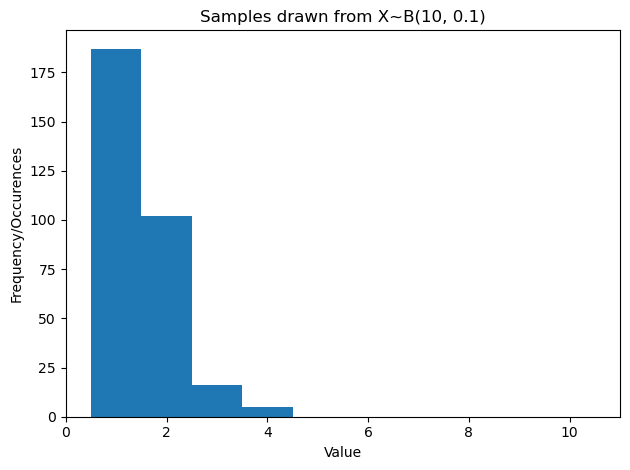

In [14]:
plow = 0.1 # this means that we can expect their to be on average of 1~2 up days in the next 10 trading days
BiasStockUplow = BinomialRandomVariable(n, plow)
simulations = 500
BinomialSimulations = BiasStockUplow.draw(simulations)
plt.hist(BinomialSimulations, bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], align = 'left')
plt.xlabel('Value')
plt.ylabel('Frequency/Occurences')
plt.title("Samples drawn from X~B(10, %s)" %plow)
plt.tight_layout();

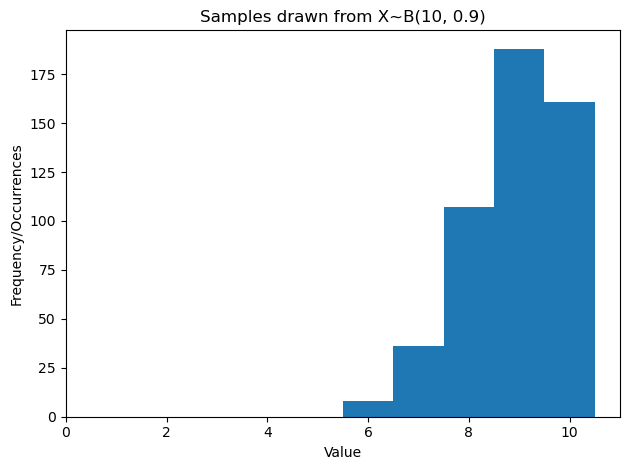

In [15]:
# can you interpret what this distribution is telling us ?
phigh = 0.9
BiasStockUpHigh = BinomialRandomVariable(n, phigh)
simulations = 500
BinomialSimulations = BiasStockUpHigh.draw(simulations)
plt.hist(BinomialSimulations, bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], align = 'left')
plt.xlabel('Value')
plt.ylabel('Frequency/Occurrences')
plt.title("Samples drawn from X~B(10, %s)" %phigh)
plt.tight_layout();

# **Continuous Random Variables**

Content:
*   Continuous random variables
  *   Probability Density Function (PDF)

**Continuous random variables:**

An event with an infinite number of outcomes. These outcomes can not be counted or described, this logically implies that we can not calculate the probability of a continuous random variable taking a specific value.

*   We can take probabilities over a range of values however, this is
achieved by using calculus.
*   The probability over a range is defined as $P(a < X < b) = P( a \leq x \leq b)$

*   The probability over a range is evaluated / calculated using the Probability Density Function (PMF). denoted f_X(x)

**Probability Density Function (PDF):**

$$
P(a \leq X \leq b) = \int_{a}^{b} f_X(x)dx
$$

The random variable $X$ has a density $f_X$

Where,
*   $f_X$ is a non-negative **Lebesgue-integrable** function (which is a function of $x$). Therefore, $f_X(x) \geq 0$ for all values of $X$ (the continuous random variable).
*   The sum under this curve is equal to 1

let's simulate the standard normal distribution (we will further explore this distribution later on)

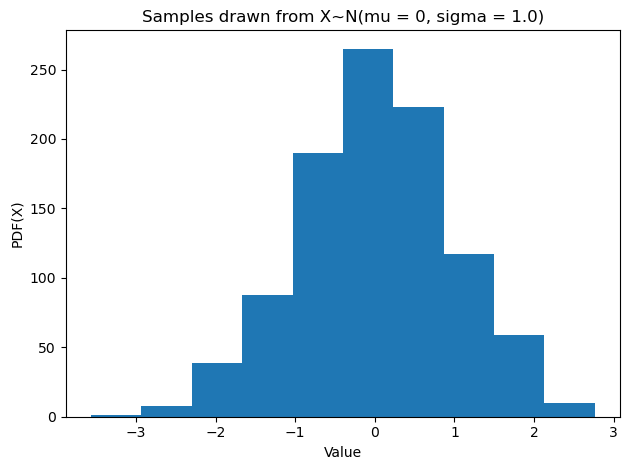

In [13]:
np.random.seed(1234)

# construct a class that stores methods and attributes for simulating a continuous probability distribution
class ContinuousRandomVariable:
  # our class instances are a and b, the mean and standard deviation respectivley
  def __init__(self, mean = 0, variance = 1):
    self.VariableType = "Continuous Normal"
    self.mean = mean
    self.StandardDev = np.sqrt(variance)
    return
  def draw(self, NumberOfSamples):
    samples = np.random.normal(self.mean, self.StandardDev, NumberOfSamples)
    return samples

# lets ctreate an object
Continuous = ContinuousRandomVariable()
Continuous.VariableType
samples = 1000
ContinuousDistribution = Continuous.draw(samples)
plt.hist(ContinuousDistribution, align = "mid")
plt.title(f"Samples drawn from X~N(mu = {Continuous.mean}, sigma = {Continuous.StandardDev})")
plt.xlabel("Value")
plt.ylabel("PDF(X)")
plt.tight_layout();

**Standard Normal PDF:**

$$
f_X(x) = \frac{1}{\sigma \cdot \sqrt{2 \pi}} e^{\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2}
$$

**Facts about the normal distribution:**

*    $68\%$ of all values fall within 1 sd (standard deviation) of the mean
*    $95\%$ of all values fall within 2 sd of the mean
*    $99\%$ of all values fall within 3 sd of the mean

**Standard Normal distribution:**

We can standardise any normal distribution into common units, so that we can compaure different normally distributed events.
For an outcome $x$ of a random variable $X$, the $Z$ transform is: $Z = \frac{x - \mu}{\sigma}$

Once we have a transformed distribution we may re-write it as $Z \sim (\mu=0, \sigma^2 = 1)$



Let's first visualise a case of a normal distribution, the standard normal distribution, this can be described by the standard normal PDF as seen prior.  

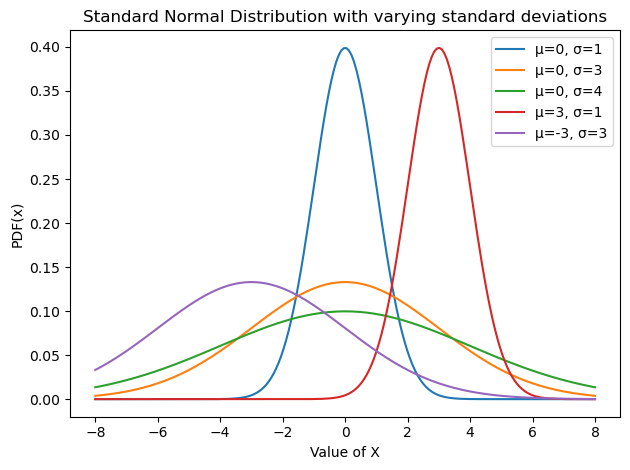

In [12]:
# Let's now use the PDF formula (PDF(x) = f(x) = y)
# note np.exp() takes arguments and raises them from base exponential (e^x, where x is the argument)
def snpdf(sigma, X, mu):
  pi = 3.14159
  fX = (1/ (sigma * np.sqrt(2 * pi))) * np.exp(-1 * ((X - mu)**2) / (2 * sigma**2))
  return fX

# lets visualise different PDF's
X = np.linspace(-8, 8, 200)
mu1 = 0
sigma1 = 1
y1 = snpdf(sigma1, X, mu1)

mu2 = 0
sigma2 = 3
y2 = snpdf(sigma2, X, mu2)

mu3 = 0
sigma3 = 4
y3 = snpdf(sigma3, X, mu3)

mu4 = 3
sigma4 = 1
y4 = snpdf(sigma4, X, mu4)

mu5 = -3
sigma5 = 3
y5 = snpdf(sigma5, X, mu5)

# let's plot our normal standard normal distributions with varying standard deviations (wider center of mass)
plt.plot(X, y1, label = f"μ={mu1}, σ={sigma1}")
plt.plot(X, y2, label = f"μ={mu2}, σ={sigma2}")
plt.plot(X, y3, label = f"μ={mu3}, σ={sigma3}")
plt.plot(X, y4, label = f"μ={mu4}, σ={sigma4}")
plt.plot(X, y5, label = f"μ={mu5}, σ={sigma5}")
plt.xlabel("Value of X")
plt.ylabel("PDF(x)")
plt.title("Standard Normal Distribution with varying standard deviations")
plt.tight_layout()
plt.legend();

**PDF for Binimial Distribution:**

Linking back to the **Binomial Distribution** chapter, given we have a binomial event ($X$) with a known probability of success ($p$), if we wish to simulate $n$ events and $n is large ($>25$) then we can approximate the binomial distributed variable ($X \sim (n, p)$) with a normal distribution. 

Formally if we let the number of trials $n$ tend to $\infty$, by **De Moivre-Laplace Theorem**, the frequency plot, or density estimate can be approximated by are-parameterised normal. Specifically 

$$
\lim_{x \rightarrow \infty} \left[ P(X = x) \right] \approx f_{X}(x ; \mu = n\cdot p, \sigma = n \cdot p (1 - p))
$$

Where:
- $f_X(x)$ is the normal PDF 

So the likelihood of $X$'s events are now approximated by the following process, $X \sim N(\mu = n\cdot p, \sigma = n \cdot p (1 - p))$

### **Standerdising Real Market Data using the Z-Transform**

In [16]:
# first lets get stock data
start_date, end_date = "2020-01-01", date.today()
ticker = "GOOG"
data = yf.download(ticker, start = start_date, end = end_date, interval = "1D", auto_adjust = True)
data = data["Close"].pct_change().dropna()
data

[*********************100%***********************]  1 of 1 completed


Ticker,GOOG
Date,
2020-01-03,-0.004907
2020-01-06,0.024657
2020-01-07,-0.000624
2020-01-08,0.007880
2020-01-09,0.011044
...,...
2025-09-22,-0.009246
2025-09-23,-0.002135
2025-09-24,-0.017873


[[-0.29428422]
 [ 1.15257632]
 [-0.08465824]
 ...
 [-0.92878201]
 [-0.3029281 ]
 [ 0.06694858]]


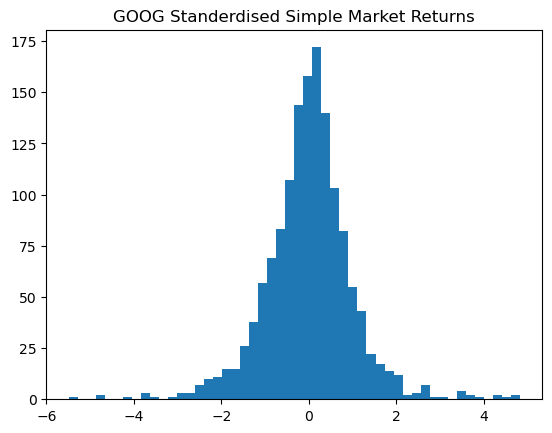

In [46]:
# transform data to the standard normal distribution
mean = np.mean(data)
sd = np.std(data, axis = 0)
dataZ = (data.values - mean) / sd.values
print(dataZ)

# plot data histogram
plt.hist(dataZ, 50)
plt.title(f'{ticker} Standerdised Simple Market Returns');

# **Distribution Estimation**

Content:
*   Parameter Estimation
*   Kernel density estimation



**Paremetric Extimation (for the Normal Distribution):**

This is when we want to find the best parameters $\theta^*$ (In our case $\mu$ and $\sigma$) given our data.

This is a form of maximum likelihood estimation (MLE). MLE attempts tio find the parameter under whichb the data is most likely.

The Likelihood for some randome variable is 

$$
L(\theta | X) = \prod_{i=1}^{n} f_X(x_i | \theta)
$$

The MLE is calculauted by maximising the likelihood with respect to $\theta$, solving for the optimal parameters and then substituting in the likelihood to find the MLE. 

$$
\text{MLE} = \max_{\theta} \, \left[ \, L(\theta | X) \, \right]
$$

The optimal parameters ($\theta^*$) are useful as they help us describe the loss distribution, from here we can calculate more accurate estimates, such as **VaR** and **CVaR** risk estimates. They are more 'accurate'' as we have a continuous form our denisty which we can derive risk measures from (e.g. VaR and CVaR). A major drwback is that we have to make an assumption of the underlying process of the distribution. 


Norm mean: 0.001105868169581671, Norm sd: 0.02043381308462896
T mean: 0.0014778537511208768, T sd: 0.014166783667396356


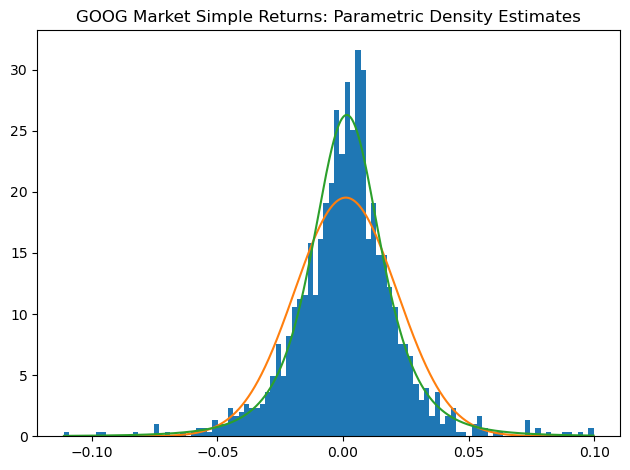

In [81]:
# lets plot our data histogram
plt.hist(data, bins = 100, density = True)
plt.title(f'{ticker} Market Simple Returns: Parametric Density Estimates')

# we want to estimate the return distribution
# it is assumed the true distribution is normal, therefore we will fit a normal distribution
parametersN = norm.fit(data)
print("Norm mean: %s, Norm sd: %s" %(parametersN[0], parametersN[1]))
x = np.linspace(np.min(data), np.max(data), 10000)
pdfN = norm.pdf(x, *parametersN)
plt.plot(x, pdfN)

# we want to estimate the return distribution
# it is assumed the true distribution is a t distribution, therefore we will fit a t distribution
parametersT = t.fit(data)
print("T mean: %s, T sd: %s" %(parametersT[1], parametersT[2]))
pdfT = t.pdf(x, *parametersT)
plt.plot(x, pdfT)
plt.tight_layout();

**Normal Distribution Test (Anderson-Darling Test):**

$H0$ (null): The data is normally distributed $\\$
$H1$ (alternative): The data is not normally distributed

rejection condition: If the test statistic > critical value for some significance level, (or if p-value < significance level). This leads us to reject $H0$ in favour of $H1$ at some confidence interval.   

In [63]:
test = anderson(np.array(data))

print("Test stat:", test.statistic)
print("Critical Values:", test.critical_values, ", For Significance Levels (%):", test.significance_level / 100)

# Compare the test stat the critical values (these are critical values corresponding to the 15%-1% significance levels)
# in this example T>CV at every significance level, the stock's returns are not normally distributed

Test stat: [-1439.01360377 -1435.04081131 -1431.06801885 ...  4273.86195186
  4277.83474432  4281.80753678]
Critical Values: [0.574 0.654 0.785 0.915 1.089] , For Significance Levels (%): [0.15  0.1   0.05  0.025 0.01 ]


### **Non-Parametric Density Estimation**

**Kernel Density Estimation:** This is a form of non-parametric modeling, this is because no population sample statistic estimates are being used.

The kernel denisty estimator function is 

$$
\hat{f}(x ; h) = \frac{1}{n} \sum_{i=1}^{n} K(u = \frac{x - x_i}{h})
$$

Here $K(u)$ is the kernel function, this can be uniform, gaussian (normal), parabolic, ... extra. We will assume the $K$ is the gaussian function evaluated at $u$.

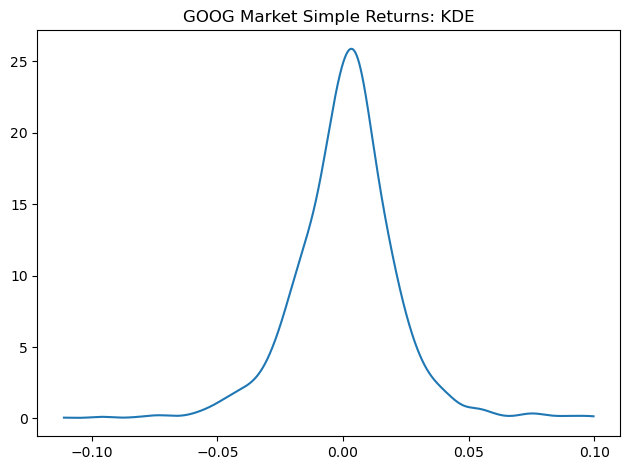

In [77]:
# KDE estimate in python
kde = gaussian_kde(np.array(data).reshape(1, -1))
pdf_kde = kde.pdf(x)
plt.plot(x, pdf_kde)
plt.title(f'{ticker} Market Simple Returns: KDE')
plt.tight_layout();

Comparison of how parametric and non-parametric methods fit our observed data

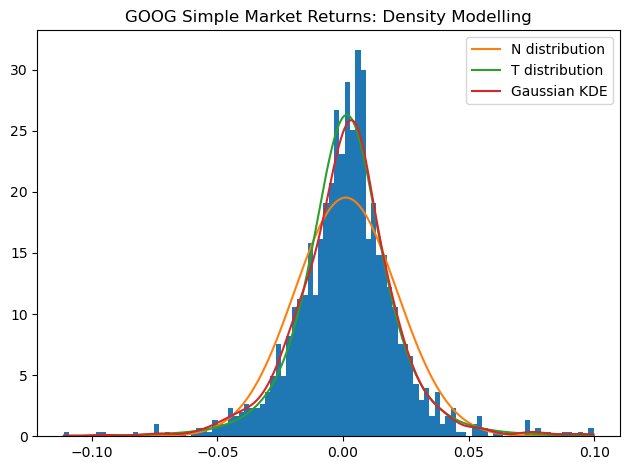

In [78]:
# comparing parameter and non parameter estimates
plt.hist(data, bins = 100, density=True)
plt.plot(x, pdfN, label = "N distribution")
plt.plot(x, pdfT, label = "T distribution")
plt.plot(x, pdf_kde, label = "Gaussian KDE")
plt.title(f"{ticker} Simple Market Returns: Density Modelling")
plt.tight_layout()
plt.legend();

## **Appendix** 


[1] - https://github.com/quantopian/research_public/blob/master/notebooks/lectures/Random_Variables/notebook.ipynb $\\$
[2] - https://en.wikipedia.org/wiki/Probability_density_function $\\$
[3] - https://en.wikipedia.org/wiki/Normal_distribution



